Bar Charts
==========
This notebook introduces the methods of creating bar charts from our data, including some of the key concepts of our plotting package, `matplotlib`. Bar charts are useful for making comparisons between close data because we are very good at evaluating the size of rectangles.

Topics covered:

- bar charts
- styling charts (titles, labels, size, color, etc)


In [1]:
import matplotlib as plt
from nycschools import schools

df = schools.load_school_demographics()


Simple Bar Chart
-------------------------
We can quickly and easily create charts in `pandas` by calling
the `bar.plot()` function on a `DataFrame`. The first step is to
create a table where the data is ready to present.
In this example, we'll create a bar chart from the school
enrollment data in `df` (the school demographics).

We'll get started by borrowing the code from our `groupby` and `agg`
examples.

In [2]:
# get a few columns for just the 2020-21 school year
boros = df[["boro", "dbn", "total_enrollment", "ay"]]
boros = boros[boros.ay == 2020]

# group the data by borough
table = boros.groupby(by="boro").agg({
    "dbn":"count", 
    "total_enrollment":["sum", "mean", "min", "max"]}).reset_index()

# rename the columns with "pretty" names
cols = ["Borough", "Num. Schools", "Total Students", "Avg School Size", "Smallest School", "Largest School"]
table.columns = cols
table

,Borough,Num. Schools,Total Students,Avg School Size,Smallest School,Largest School
0,Bronx,460,217775,473.423913,7,2936
1,Brooklyn,580,315797,544.477586,46,5921
2,Manhattan,361,168814,467.628809,14,3342
3,Queens,391,283289,724.524297,42,4424
4,Staten Island,83,63824,768.963855,144,3726


### Drawing the plot
Making a chart from our `table` is as simple as calling `plot.bar()`. In the example below we specify that we want enrollment (school size) as the vertical y-axis and Borough as our x-axis.

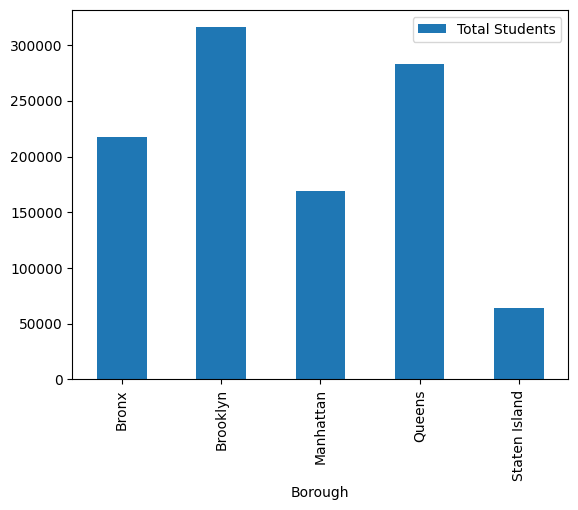

In [3]:
ax = table.plot.bar(x="Borough", y=["Total Students"])

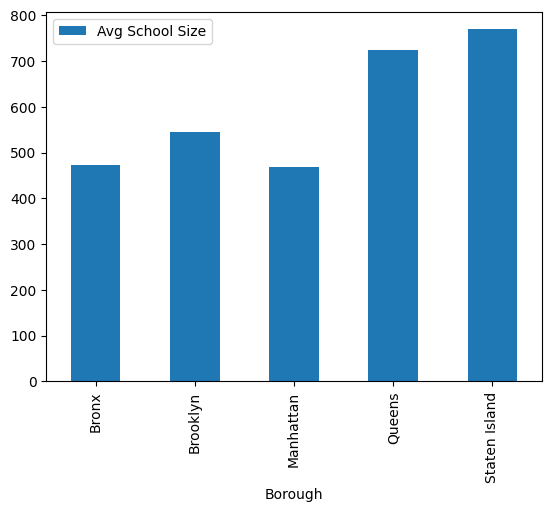

In [4]:
# doe the same thing with average school size
ax = table.plot.bar(x="Borough", y=["Avg School Size"])

Labels, figure size, and more
------------------------------------------
We can make a pretty decent bar chart for a single line of code, but with a few more arguments to our function, we can make it even better. To do this, we're going to use a few more features from `matplotlib` and related libraries.

In this example we will specify:

- sorting the columns by size
- setting the images size
- adding titles and labels
- changing colors

You may have noticed that we were assigning the **return** value from `plot()` into a new variable called `ax`. This servers the simple purpose of showing only the chart (and not the return value), but it also allows us to keep adding items to our chart. 

In [5]:
# before drawing anything, change the "style"
plt.style.use('dark_background')

# show all the styles
# change dark_background to any style from this list to try it out
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

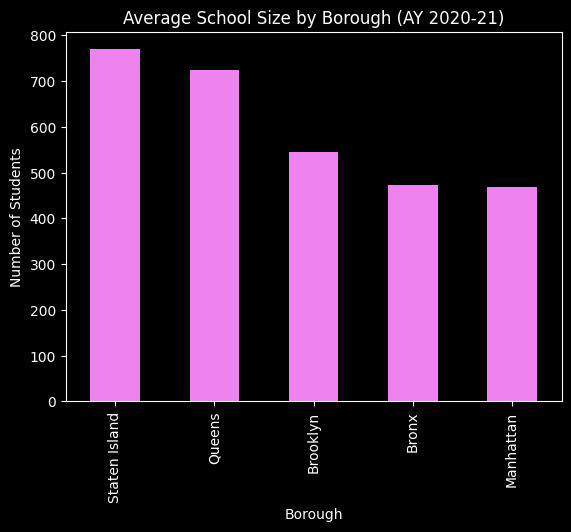

In [6]:
# sort the tabgle in descending order by school size -- this will order our bars
table = table.sort_values(by="Avg School Size", ascending=False)

ax = table.plot.bar(x="Borough", y=["Avg School Size"], color="violet")
ax.set_title("Average School Size by Borough (AY 2020-21)")
ax.set_ylabel("Number of Students")
ax.get_legend().remove()